In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# APEX Gun 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [3]:
from distgen import Generator

gen = Generator('distgen_laser.yaml')
gen['n_particle'] = 10000
gen

<disgten.Generator with input: 
n_particle: 10000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 10
xy_dist:
  file: /Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/apex_gun/2019_11_04_135614reg_out.txt
  type: file2d

>

In [4]:
gen.run()
gen.particles

<ParticleGroup with 10000 particles at 0x15c57a430>

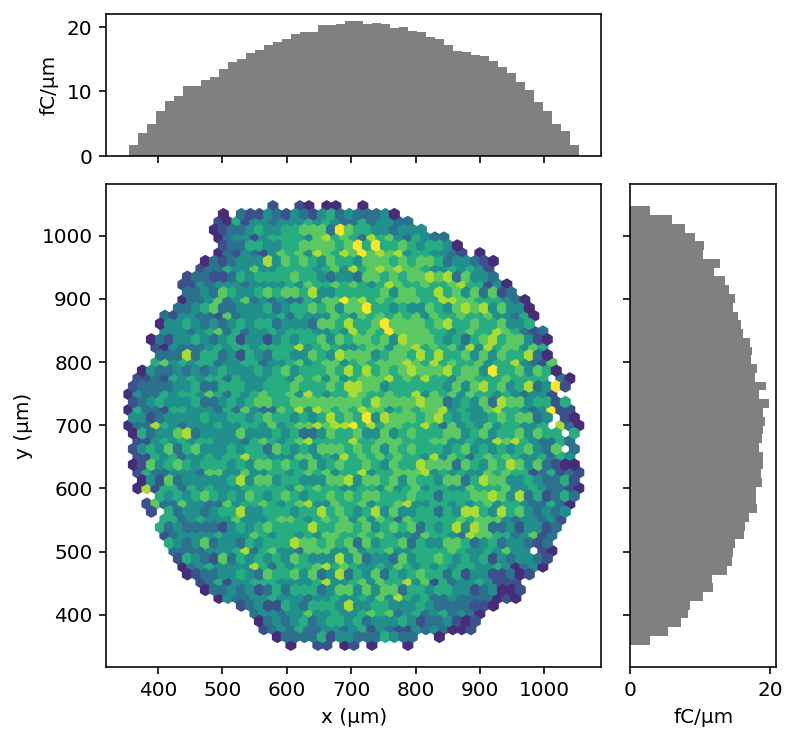

In [5]:
gen.particles.plot('x', 'y', bins=50)

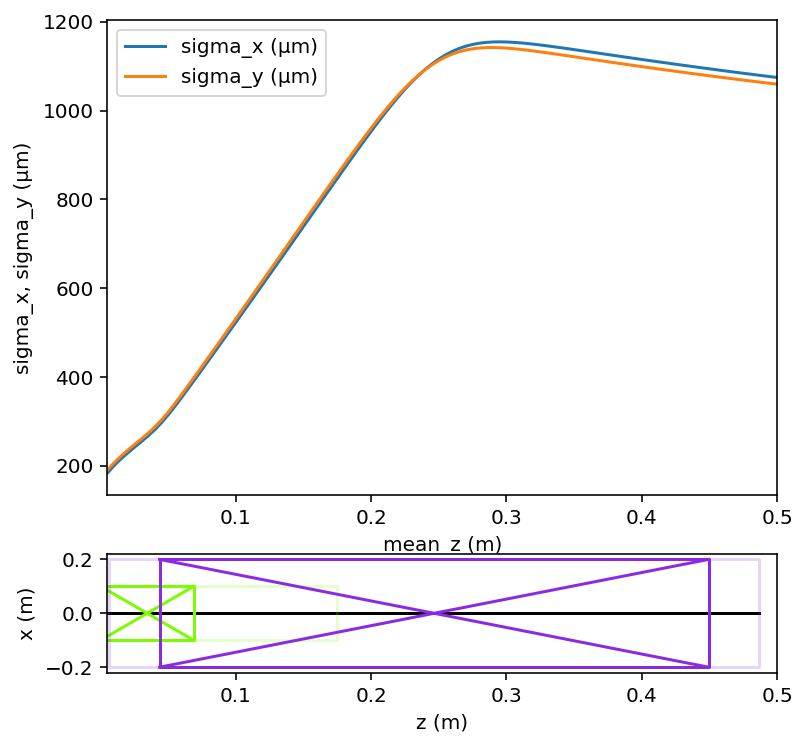

In [12]:
G.plot(['sigma_x', 'sigma_y'], data_type='screen')

In [13]:
G.n_tout

191

In [20]:
G = GPT('gpt.in', initial_particles=gen.particles)
G.set_variables({'gun_peak_field':20e6, 'gun_oncrest_phase':171.340, 'tmax': 5e-9, 'RadiusMax':.015,
                  'Ntout':500, 'dtmin':0, 'GBacc':6.5, 'xacc':6.5, 'space_charge':0, 'BSOL':0.057});

In [21]:
G.run(gpt_verbose=False)

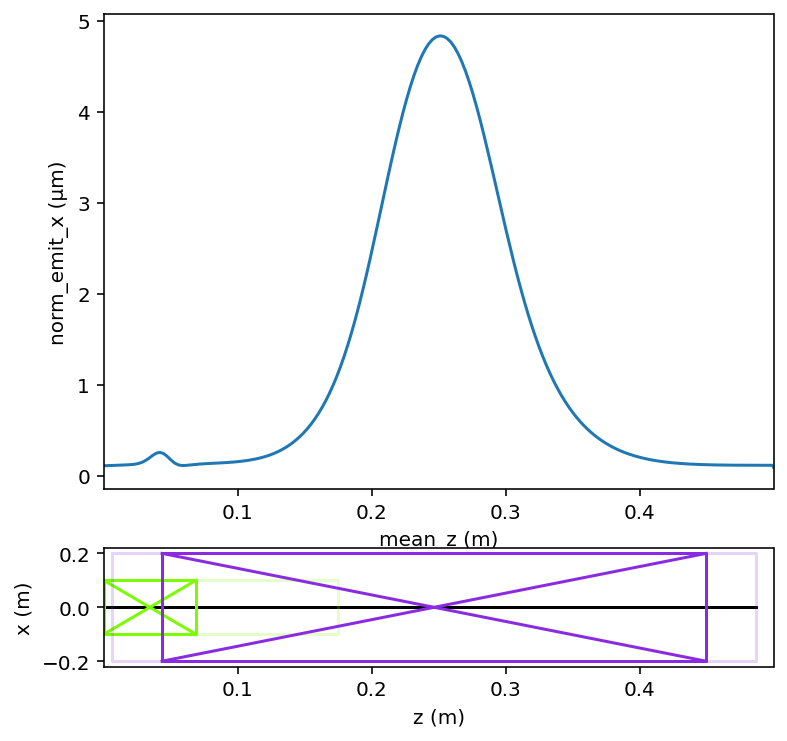

In [23]:
G.plot('norm_emit_x')

In [16]:
#fig = G.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(1e-3,.6), ylim=(0, 6e-6), ylim2=(0, 800e-6),figsize=(6,6), return_figure=True, include_layout=True)
#fig.axes[0].set_title('LUME-GPT')

#fig.axes[1].axis('off')
#fig.axes[1].set_ylim(-.5, .5)
#plt.savefig('apex-gun-lume-gpt.png', dpi=150 , bbox_inches='tight')

In [17]:
#G.particles[-1].plot('x', 'y', bins=50)

In [18]:
#G.archive()

In [19]:
#!rm *h5